In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

## Prob 1

Convolution is defined as $y[n] = \sum_{m=-\infty}^{m=\infty}x[m]h[n-m]$. If x[n] is a Kronecker's delta function $\delta_{n,n_0}$, then the convolution of x[n] and kernel h[n] would simply be a time shift of h, that is $y[n] = h[n-n_0]$.

Since convolution is a linear transformation, to do the convolution of a function, we can decompose the function x, do the convolution for each component and then sum them up. We can first decompose any function x[n] into a sum of delta functions (impulses). And then do the convolution for each delta function, we'll get the time shift kernel. Finally, sum over the individual convolution, we get the convolution for the function.

So the resulting convolution for each signal is:

A -> W

B -> Y

C -> Z

D -> X

We can also check with the following programimg:

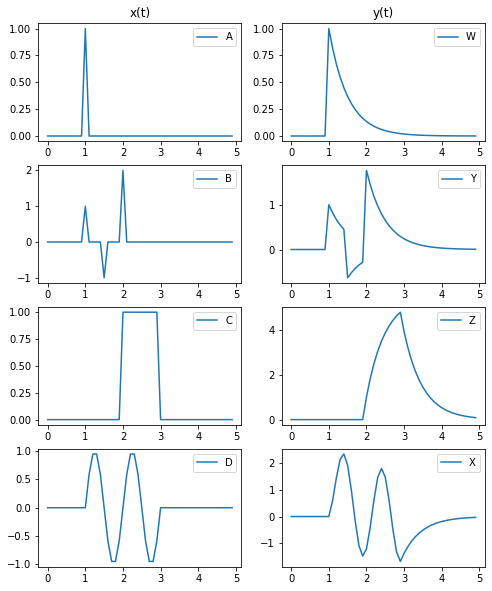

In [19]:
t = np.arange(0,5,0.1)
k = np.exp(-2*t) #kernal

# a
a = np.zeros(len(t))
a[10] = 1
ya = np.convolve(a,k)
fig = plt.figure(figsize=(8,10))
plt.subplot(421)
plt.plot(t,a)
plt.title('x(t)')
plt.legend('A')
plt.subplot(422)
plt.plot(t,ya[0:len(t)])
plt.title('y(t)')
plt.legend('W')

# b
b = np.zeros(len(t))
b[10] = 1
b[15] = -1
b[20] = 2
yb = np.convolve(b,k)
plt.subplot(423)
plt.plot(t,b)
plt.legend('B')
plt.subplot(424)
plt.plot(t,yb[0:len(t)])
plt.legend('Y')

# c
c = np.zeros(len(t))
c[20:30] = 1
yc = np.convolve(c,k)
plt.subplot(425)
plt.plot(t,c)
plt.legend('C')
plt.subplot(426)
plt.plot(t,yc[0:len(t)])
plt.legend('Z')

# d
d = np.zeros(len(t))
d[10:30] = np.sin(2*np.pi*t[10:30])
yd = np.convolve(d,k)
plt.subplot(427)
plt.plot(t,d)
plt.legend('D')
plt.subplot(428)
plt.plot(t,yd[0:len(t)])
plt.legend('X')

## Prob 2

## For a transformation $y(t) = H[x(t)]$,

## Criteria for a linear transformation: the transformation of sum of the signals is equal to the sum of the transformation of each signal, i.e. $H[x_1(t)+x_2(t)] = H[x_1(t)]+H[x_2(t)]$

## Criterial for a time-invariant transformation: a system's response to the transformation is identical at different time point. In other words, do the transformation before or after time shift would lead to the same result. i.e. if $y(t-t') = H[x(t-t')]$, where $H[x(t-t')]$ means doing transformation after time-shift and $y(t-t')$ means doing transformation before time-shift

## a. y[n] = H[x[n]] = 10 x[n] is both linear and time-invariant
   
   linear?  $H[(x_1[n] + x_2[n])] = 10 (x_1[n] + x_2[n]) = 10 x_1[n] + 10 x_2[n] = H[x_1[n]]+H[x_2[n]]$ ,  YES
   
   time-invariant? let's shift the series by m steps before and after the transformation and see if they're equal or not:
   
   shift the series before transformation: $H[x[n-m]] = x[n'-m]|_{n'=n} = 10 x[n-m]$
   
   shift the series after transformation: $y[n-m] = 10 x[n-m]$
   
   Since $y[n-m] = H[x[n-m]]$, it is time-invarint.
   
## b. y[n] = H[x[n]] = 10 x[n-5] is both linear and time-invariant
   
   linear? $H[(x_1[n] + x_2[n])] = 10 (x_1[n-5] + x_2[n-5]) = 10 x_1[n-5] + 10 x_2[n-5] = H[x_1[n]]+H[x_2[n]]$, YES

   time-invariant?
   
   $H[x[n-m]] = x[n'-m]|_{n'=n-5} = 10 x[n-5-m]$
   
   $y[n-m] = 10 x[n-m-5] = 10 x[n-5-m]$
   
   Since $y[n-m] = H[x[n-m]]$, it is time-invarint.
   
## c. y[n] = H[x[n]] = 3x[n] + 2x[n-1] + 10x[n-3] is both linear and time-invariant
   
   linear? $H[(x_1[n] + x_2[n])] = 3(x_1[n] + x_2[n]) + 2(x_1[n-1] + x_2[n-1]) + 10(x_1[n-3] + x_2[n-3]) = H[x_1[n]]+H[x_2[n]]$, YES

   time-invariant?
   
   $H[x[n-m]] = 3x[n'-m]|_{n'=n} + 2x[n'-m]|_{n'=n-1} +10x[n'-m]|_{n'=n-3} = 3x[n-m] + 2x[n-1-m] +10x[n-3-m]$
   
   $y[n-m] = 3x[n-m] + 2x[n-m-1] +10x[n-m-3]$
   
   Since $y[n-m] = H[x[n-m]]$, it is time-invarint.
   
## d. y[n] = x[n]x[n-1] is time-invariant

   linear?  
   
   $H[(x_1[n] + x_2[n])] = (x_1[n] + x_2[n])(x_1[n-1] + x_2[n-1])=x_1[n]x_1[n-1]+x_1[n]x_2[n-1]+x_2[n]x_1[n-1]+ x_2[n]x_2[n-1]$
   
   $H[x_1[n]]+H[x_2[n]] = x_1[n]x_1[n-1]+x_1[n]x_2[n-1]$ 
   
   Since $H[x_1(t)+x_2(t)] \neq H[x_1(t)]+H[x_2(t)]$, it is NOT linear.
   
   time_invariant?
   
   $H[x[n-m]] = (x[n'-m]|_{n'=n})(x[n'-m]|_{n'=n-1}) = x[n-m]x[n-1-m]$
   
   $y[n-m] = x[n-m]x[n-m-1]$
   
   Since $y[n-m] = H[x[n-m]]$, it is time-invarint.
   
## e. y[n] = log($x[n]^2$+5) is time-invariant

   linear?  
   
   $H[(x_1[n] + x_2[n])] = log((x_1[n]+x_2[n])^2+5)$
   
   $H[x_1[n]]+H[x_2[n]] = log(x_1[n]^2+5)+log(x_2[n]^2+5)$ 
   
   Since $H[x_1(t)+x_2(t)] \neq H[x_1(t)]+H[x_2(t)]$, it is NOT linear.
   
   time_invariant?
   
   $H[x[n-m]] = log(x[n'-m]^2+5)|_{n'=n} = log(x[n-m]^2+5)$
   
   $y[n-m] = log(x[n-m]^2+5)$
   
   Since $y[n-m] = H[x[n-m]]$, it is time-invarint.
 
## f. y[n] = sin(x[n]) is time-invariant

   linear?  
   
   $H[(x_1[n] + x_2[n])] = sin(x_1[n] + x_2[n])$
   
   $H[x_1[n]]+H[x_2[n]] = sin(x_1[n]) + sin(x_2[n])$ 
   
   Since $H[x_1(t)+x_2(t)] \neq H[x_1(t)]+H[x_2(t)]$, it is NOT linear.
   
   time_invariant?
   
   $H[x[n-m]] = sin(x[n'-m])|_{n'=n} = sin(x[n-m])$
   
   $y[n-m] = sin(x[n-m])$
   
   Since $y[n-m] = H[x[n-m]]$, it is time-invarint. 
   

   
## g. y[n] = H[x[n]] = x[5n] is linear

   linear?  $H[(x_1[n] + x_2[n])] = (x_1[5n] + x_2[5n]) = H[x_1[n]]+H[x_2[n]]$ ,  YES
   
   time_invariant?
   
   $H[x[n-m]] = x[n'-m]|_{n'=5n} = x[5n-m]$
   
   $y[n-m] = x[5(n-m)]$
   
   Since $y[n-m] \neq H[x[n-m]]$, it is NOT time-invarint. 
   You can think about it graphically: y[n] = x[5n] means the transformation suqeezes the x-axis by 5 times (i.e. y[1] = x[5], y[2] = x[10] tells us that the five data points from x(x[6]~x[10]) was squeezed into y between y[1] and y[2]). For such a transformation that rescales axis, it will lead to different results whether you did shift or transformation first.
   
## We can also check it with programming  below 

Here I assum one function is x1 = sin(0.3$\pi$ t), another is x2 = 0.5cos(2$\pi$ t). But it doesn't matter which function you choose. The properties(linear or time-invariant) is independent of the function. It's the property of the transformation(H(x(t))). The function x1 and x2 I chose is just for visulization.

For each part, the top two figures are for checking linearity. If $H[(x_1(t)+x_2(t))]$(red line on the right) and $H[x_1(t)]+H[x_2(t)]$(black dash line) overlaps, the transformationis linear.

the bottom two figures are for checking time-invariance. If $H[x(t-1)]$(red line on the right) and $y(t-1)$(blue dash line) overlaps, the transformationis time-invariant.


In [3]:
t = np.linspace(0, 6, 100)
x1 = lambda t: np.sin(0.3*np.pi*t)
x2 = lambda t: 0.5*np.cos(2*np.pi*t)

def Linearity(H):
    fig = plt.figure(figsize=(10,3))
    x12 = lambda t: x1(t)+x2(t)
    plt.subplot(1,2,1)
    plt.plot(t, x1(t), label=r'$x_1(t)$')
    plt.plot(t, x2(t),'g', label=r'$x_2(t)$')
    plt.plot(t, x12(t),'r', label=r'$x_1(t)+x_2(t)$')
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('x')
    
    plt.subplot(1,2,2)
    plt.plot(t, H(x1)(t), label=r'$H[x_1(t)]$')
    plt.plot(t, H(x2)(t),'g', label=r'$H[y_2(t)]$')
    plt.plot(t, H(x12)(t),'r', label=r'$H[(x_1(t)+x_2(t))]$')
    plt.plot(t, H(x1)(t)+H(x2)(t), 'k--',lw = 2, label=r'$H[x_1(t)]+H[x_2(t)]$')
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('y')
    print("Check linearity")
    plt.show()

def TimeInvariance(H):   
    fig= plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    plt.plot(t, x1(t), label='$x(t)$')
    plt.plot(t, x1(t-1), label=r'$x(t-1)$')
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('x')
    
    st = H(lambda t: x1(t-1))
    plt.subplot(1,2,2)
    plt.plot(t, H(x1)(t), label=r'$H[x(t)]$')
    plt.plot(t, st(t),'r', label=r'$H[x(t-1)]$')
    plt.plot(t, H(x1)(t-1),'b--', lw=2, label=r'$y(t-1)$')
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('y')
    print("Check Time-invariance")
    plt.show()

Check linearity


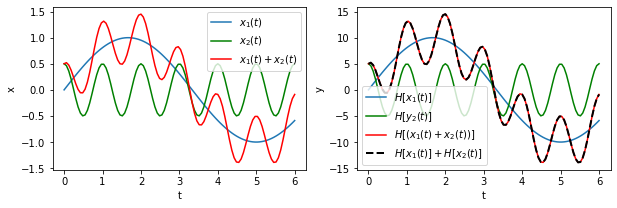

Check Time-invariance


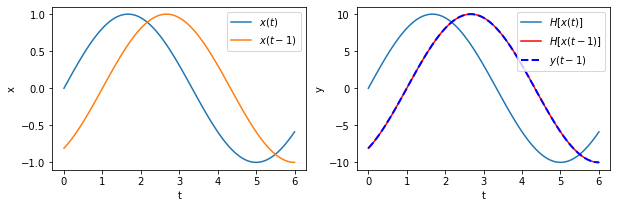

Result: y[n] = 10x[n] is both linear and time-variant


In [4]:
# 2a

def H(x):
    return lambda t: 10*x(t)
Linearity(H)
TimeInvariance(H)

print("Result: y[n] = 10x[n] is both linear and time-variant")

Check linearity


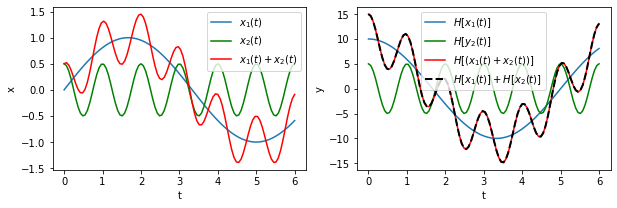

Check Time-invariance


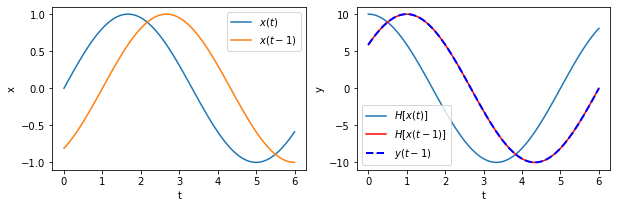

Result: y[n] = 10x[n-5] is both linear and time-variant


In [5]:
# 2b

def H(x):
    return lambda t: 10*x(t-5)
Linearity(H)
TimeInvariance(H)

print("Result: y[n] = 10x[n-5] is both linear and time-variant")

Check linearity


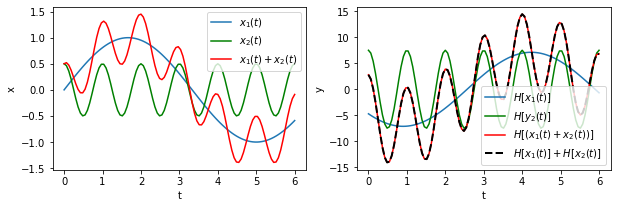

Check Time-invariance


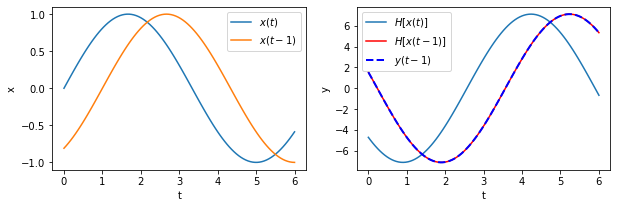

Result: y[n] = 3*x[n] + 2x[n-1] + 10x[n-3] is both linear and time-variant


In [6]:
# 2c

def H(x):
    return lambda t: 3*x(t) + 2*x(t-1) + 10*x(t-3)
Linearity(H)
TimeInvariance(H)

print("Result: y[n] = 3*x[n] + 2x[n-1] + 10x[n-3] is both linear and time-variant")

Check linearity


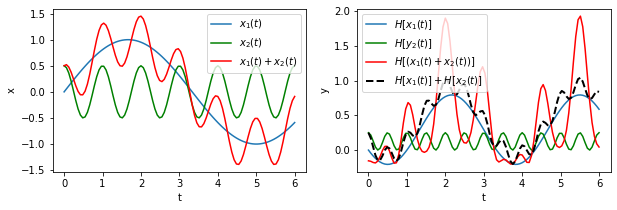

Check Time-invariance


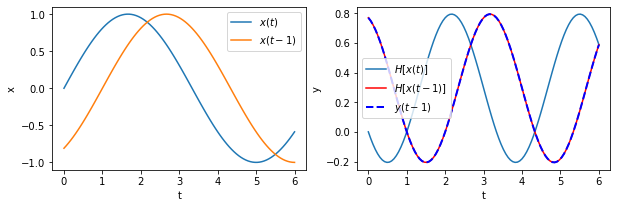

Result: y[n] = x[n]x[n-1] is time-variant but not linear


In [7]:
# 2d

def H(x):
    return lambda t: x(t)*x(t-1)
Linearity(H)
TimeInvariance(H)

print("Result: y[n] = x[n]x[n-1] is time-variant but not linear")

Check linearity


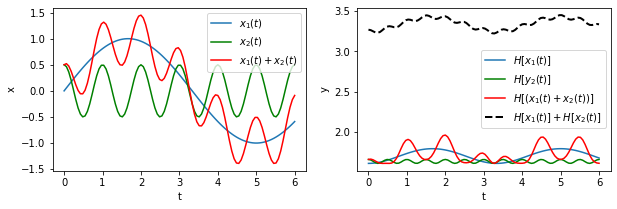

Check Time-invariance


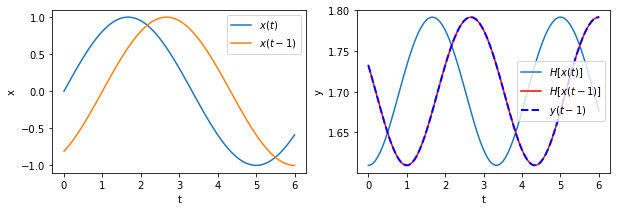

Result: y[n] = log(x[n]**2+5) is time-variant but not linear


In [8]:
# 2e

def H(x):
    return lambda t: np.log(x(t)**2+5)
Linearity(H)
TimeInvariance(H)

print("Result: y[n] = log(x[n]**2+5) is time-variant but not linear")

Check linearity


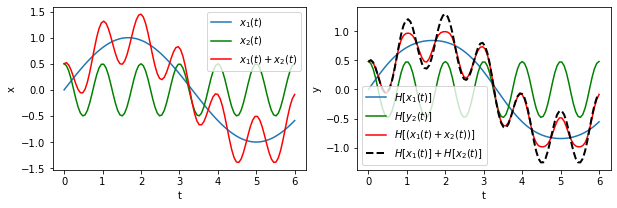

Check Time-invariance


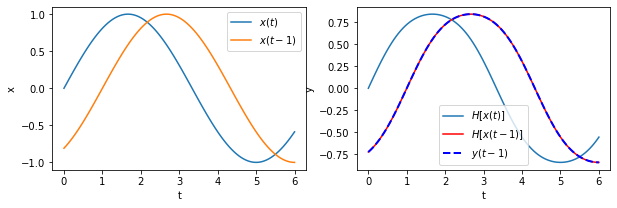

Result: y[n] = sin(x[n]) is time-variant but not linear


In [9]:
# 2f

def H(x):
    return lambda t: np.sin(x(t))
Linearity(H)
TimeInvariance(H)

print("Result: y[n] = sin(x[n]) is time-variant but not linear")

Check linearity


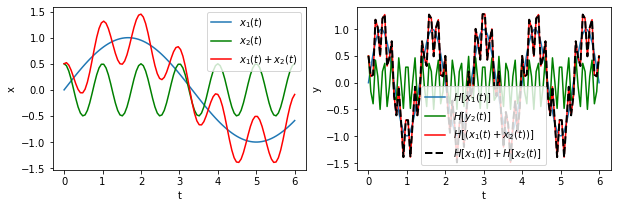

Check Time-invariance


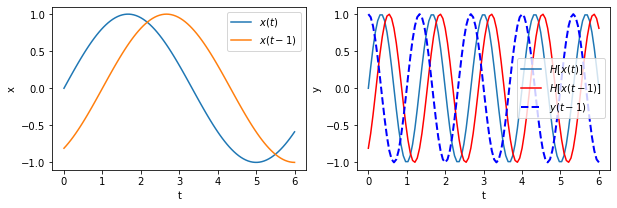

Result: y[n] = x[5n] is linear but not time-variant


In [10]:
# 2g

def H(x):
    return lambda t: x(5*t)
Linearity(H)
TimeInvariance(H)

print("Result: y[n] = x[5n] is linear but not time-variant")

## Prob 3

In [11]:
## load data
data = pd.read_csv('HW3_Cogs118C_eeg.csv')

In [12]:
# 3a

Ts = np.average(np.diff(data.Time))
Fs = 1/Ts
T = max(data.Time)-min(data.Time)
print('(a) Since the time inteval between each data point is Ts = {}(s), \
the sampling rate Fs = 1/Fs = {}(Hz). The duration is the maximum time minus the initial time, T = {}(s)' .format(Ts,Fs,T) )

(a) Since the time inteval between each data point is Ts = 0.002(s), the sampling rate Fs = 1/Fs = 500.0(Hz). The duration is the maximum time minus the initial time, T = 9.996(s)


I notice that there is a fast, small oscillation and a slow oscillation.


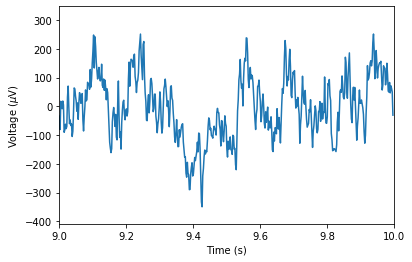

In [13]:
# 3b

plt.plot(data.Time,data.EEG)
plt.xlim(9,10)
plt.xlabel('Time (s)')
plt.ylabel(r'Voltage ($\mu$V)')
print('I notice that there is a fast, small oscillation and a slow oscillation.')

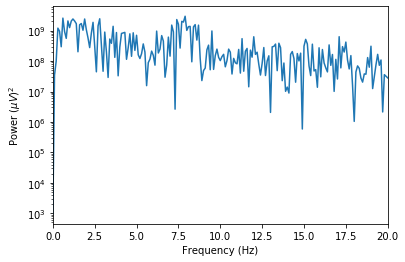

In [14]:
# 3c
DATA = np.fft.fft(data.EEG)
f = np.fft.fftfreq(len(data), 1/Fs)
DATA = np.fft.fftshift(DATA)
f = np.fft.fftshift(f)
pw = np.abs(DATA)**2

plt.semilogy(f,pw)
plt.xlim(0,20)
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'Power $(\mu V)^2$')
plt.show()

In [15]:
# 3d

print('Longer recording will make frequency resolution get higher,but not decrease the power of noise.\
 As a result, longer recording will NOT reduce the irregular fluctuation.') 

Longer recording will make frequency resolution get higher,but not decrease the power of noise. As a result, longer recording will NOT reduce the irregular fluctuation.


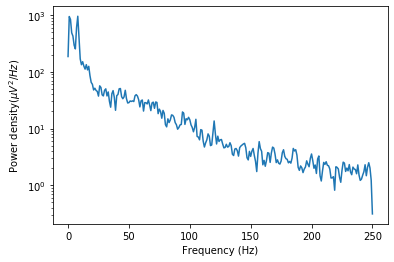

In [16]:
# 3e

fw, DATA_welch = signal.welch(data.EEG, Fs, nperseg=500)
plt.semilogy(fw, DATA_welch) # Since scipy.signal.welch gives you "power spectrum density", you don't need to square the result
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'Power density$(\mu V^2/Hz)$')
plt.show()

In [17]:
# 3f

df = np.average(np.diff(fw))
print('The frequency resolution =',df,'(Hz), or you can also calculate it by delta f = 1/T = 1/(nperseg/Fs) = 500/500 = 1 (Hz)')

The frequency resolution = 1.0 (Hz), or you can also calculate it by delta f = 1/T = 1/(nperseg/Fs) = 500/500 = 1 (Hz)



# g.

Welch's method uses overlapping windows to do power spectrum analysis and averaging the power spectrum calculated from each window. Since each window is approximately uncorrelated, noise of the spectrum will be canceled out and leave the signal.

# h
Since $\Delta f = \frac{1}{T_{chunk}} = \frac{F_s}{nperseg}$, 

to get $\Delta f = 0.25$ with sampling rate Fs=500, we need nperseg = 2000 (2000 data points in a chunk). 

The resulting power spectrum gives finer resolution but noisier than the one with nperseg = 500.

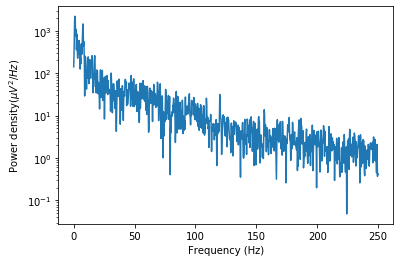

In [18]:
f2, DATA_welch = signal.welch(data.EEG, Fs, nperseg=2000)
plt.semilogy(f2, DATA_welch)
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'Power density$(\mu V^2/Hz)$')
plt.show()